# 케라스 신경망 예제

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 단순 신경망 예제

In [1]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import plot_model

In [3]:
model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(1, activation='relu')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


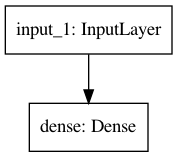

In [4]:
plot_model(model)

In [5]:
model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(2, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


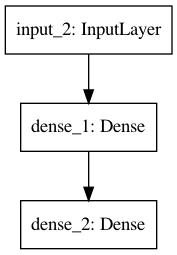

In [6]:
plot_model(model)

In [7]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(2, activation='relu'),
    Dropout(.5),
    Dense(2, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


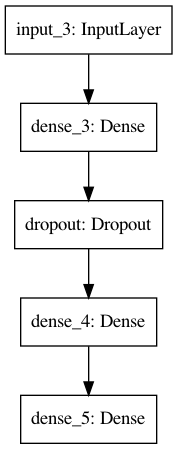

In [8]:
plot_model(model)

## MNIST 숫자 이미지 분류 모델

In [93]:
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense

In [94]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) [7 2 1 ... 4 5 6]


In [95]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [96]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

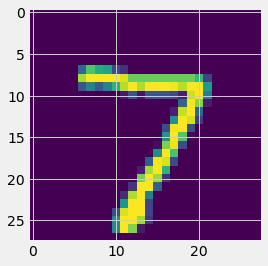

In [97]:
plt.imshow(test_images[0])

In [98]:
X = train_images.reshape((60000, 28 * 28)).astype("float32") / 255 
X_tst = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
print(X.shape, train_labels.shape, X_tst.shape, test_labels.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [99]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
model.fit(X, train_labels, epochs=3, batch_size=128)
model.summary()

Epoch 1/3
469/469 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9259
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9688
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9794
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [101]:
p = model.predict(X_tst)
print(p[0])

[1.2307868e-08 5.3361421e-10 4.1219532e-06 8.7345055e-05 6.2382571e-11
 1.6594444e-06 3.5706971e-12 9.9990547e-01 7.9382784e-07 4.7194584e-07]


Text(0, 0.5, 'Probability Score')

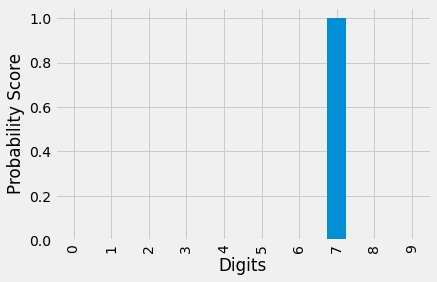

In [103]:
ax = pd.Series(p[0]).plot.bar()
ax.set_xlabel('Digits')
ax.set_ylabel('Probability Score')

In [102]:
test_loss, test_acc = model.evaluate(X_tst, test_labels)
print(f"test_acc: {test_acc:.4f}")

313/313 [==============================] - 0s 651us/step - loss: 0.0754 - accuracy: 0.9762
test_acc: 0.9762
